In [41]:
# Grabbing data
import requests
import zipfile
import os

# Define the years for which you want to download the survey data
years = [2018, 2019, 2020, 2021, 2022]

# Create a directory to store the downloaded files
directory = "so_survey_data"
if not os.path.exists(directory):
    os.makedirs(directory)

# Download and extract the survey data for each year
for year in years:
    print(f"Downloading Stack Overflow survey data for {year}...")
    url = f"https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-{year}.zip"
    response = requests.get(url)
    
    # Save the zip file
    zip_file_path = os.path.join(directory, f"{year}survey.zip")
    with open(zip_file_path, "wb") as file:
        file.write(response.content)
    
    # Extract the contents of the zip file
    extract_path = os.path.join(directory, str(year))
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    
    # Delete the downloaded zip file
    os.remove(zip_file_path)
    
    print(f"Downloaded and extracted survey data for {year}.")

print("All survey data downloaded and extracted successfully.")

Downloaded and extracted survey data for 2018.
Downloaded and extracted survey data for 2019.
Downloaded and extracted survey data for 2020.
Downloaded and extracted survey data for 2021.
Downloaded and extracted survey data for 2022.
All survey data downloaded and extracted successfully.


In [42]:
BASE_DIR = 'so_survey_data'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

years = list(range(2018, 2023))

all_df = {}

for year in years:
    all_df[year] = pd.read_csv(f'{BASE_DIR}/{year}/survey_results_public.csv')
    print(all_df[year].shape)

/tmp/ipykernel_25795/2249560887.py:12: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df[year] = pd.read_csv(f'{BASE_DIR}/{year}/survey_results_public.csv')


(98855, 129)
(88883, 85)
(64461, 61)
(83439, 48)
(73268, 79)


In [20]:
framework_columns= {2018: ['FrameworkWorkedWith', 'FrameworkDesireNextYear'],
 2019: ['WebFrameWorkedWith', 'WebFrameDesireNextYear'],
 2020: ['WebframeWorkedWith', 'WebframeDesireNextYear'],
 2021: ['WebframeHaveWorkedWith', 'WebframeWantToWorkWith'],
 2022: ['WebframeHaveWorkedWith', 'WebframeHaveWorkedWith']}

In [43]:
results_list = {}
for year in years:
    result_df = all_df[year]
    column = framework_columns[year][0]
    n_web = result_df[column].notnull().sum()
    web_results_df = result_df[column].str.split(';').explode()
    results_list[year] = web_results_df.value_counts() / n_web


results_raw = pd.DataFrame(results_list)

<Axes: title={'center': 'Web Frameworks Stack Overflow Developers Worked With'}, xlabel='Year', ylabel='Percentage of Respondents'>

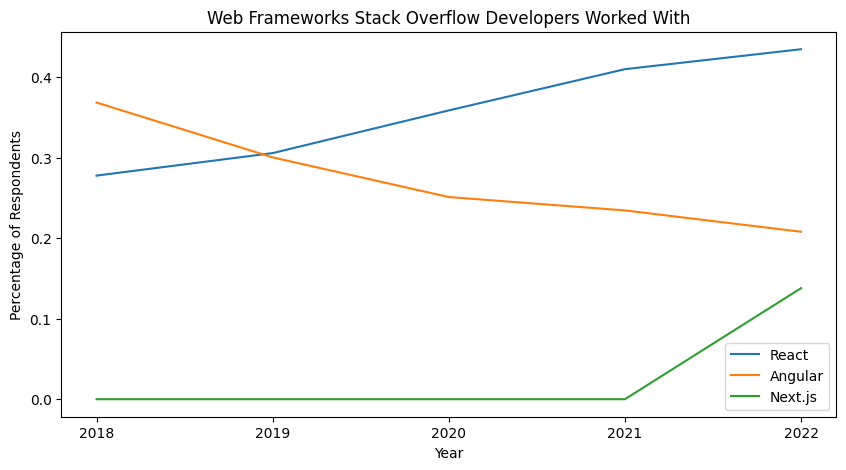

In [55]:
results = results_raw.transpose()
results = results[['React', 'React.js', 'Angular', 'Angular.js', 'Angular/Angular.js', 'Next.js']].fillna(0)
results = pd.DataFrame({
    'React':results['React.js'] + results['React'],
    'Angular':results['Angular'] + results["Angular/Angular.js"],
    'Next.js': results['Next.js']
})

results.plot(
    figsize=(10, 5), 
    title='Web Frameworks Stack Overflow Developers Worked With', 
    ylabel='Percentage of Respondents', 
    xlabel='Year',
    xticks=years
)

<Axes: title={'center': 'Time Series Stars on GitHub'}, xlabel='Date', ylabel='Stars'>

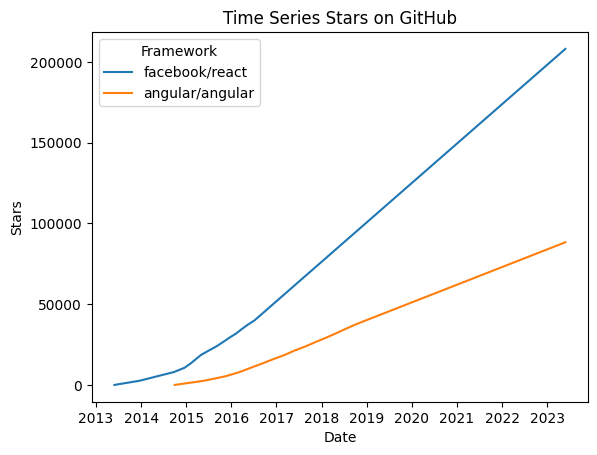

In [24]:
# CSV generated from https://star-history.com/#facebook/react&angular/angular&Date

stars = pd.read_csv('star-history-2023528.csv', names=['Framework', 'Date', 'Stars'])
stars['Date'] = pd.to_datetime(stars['Date'].str.removesuffix(' (Australian Eastern Standard Time)'), format='%a %b %d %Y %H:%M:%S GMT%z')

ax = plt.subplot(
    title='Time Series Stars on GitHub', 
    xlabel='Date', 
    ylabel='Stars'
)

sns.lineplot(
    data=stars,
    x='Date',
    y='Stars',
    hue='Framework',
    ax=ax
)